<h1>Convolutional Neural Network for MNIST</h1>
<h3>Goal:</h3>
<p>The following project is an extension of the MLP for MNIST project. We are building an CNN to classify MNIST, hand-written digits, data. We first import the data from <i>tensorflow</i> and normalize it to have numbers between 0 and 1. When building the network we use max pooling of size 2x2, convolutions with a kernel size 3x3, activations using ReLu, and also include a dropout of 50%. Although it may be overkill for just MNIST, it is primal structure for tackling more complex problems.</p>

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# The number of digits, 0-9
num_of_classes = 10
# The shape of each image in MNIST
input_shape = (28,28,1)

<h3>Import the data and plot one digit</h3>
<p>The plotting is simply for nice visuals that the data was imported properly</p>

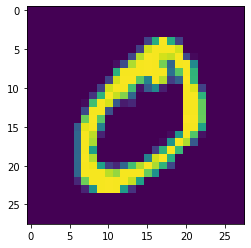

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
plt.imshow(x_train[1])

<h3>Reshape the data and normalize</h3>
<p>The data comes as a matrix representing the pixels and so lines 2 and 3 here are flattening them to have a vector rather than matrix</p>

In [14]:
# Now we scale our data to [0,1]
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Next we make sure images have the proper shape (28, 28, 1) by adding a new channel
x_train = x_train[..., tf.newaxis].astype('float32')
x_test = x_test[..., tf.newaxis].astype('float32')

y_train = tf.keras.utils.to_categorical(y_train, num_of_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_of_classes)

<h3>Next, we create the CNN model and compile it</h3>

In [15]:
# Now we build the model
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_of_classes, activation='softmax')
    ]
)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h3>The following is a quick look at a summary of the model</h3>

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

<h3>The final step is to train the model using the <i>fit</i> method</h3>

In [17]:
batch_size = 128
epochs = 6
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/6
469/469 [==============================] - 11s 4ms/step - loss: 0.3333 - accuracy: 0.8988 0s - loss:
Epoch 2/6
469/469 [==============================] - 2s 4ms/step - loss: 0.1048 - accuracy: 0.9674
Epoch 3/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0798 - accuracy: 0.9758: 0s -
Epoch 4/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 5/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0591 - accuracy: 0.9815
Epoch 6/6
469/469 [==============================] - 2s 4ms/step - loss: 0.0517 - accuracy: 0.9839


<h3>Plot the accuracy per epoch</h3><h3>Lastly, we make predictions over the testing data and check the accuracy</h3>
<p>We first make a prediction and then use the built in evaluation method that will make predictions on the test set and then compute the accuracy.</p>

In [ ]:
predictions = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)

196/313 [=================>............] - ETA: 0s - loss: 0.0380 - accuracy: 0.9868